In [1]:
'''
***Logistic regression
    
    Classification algorithm
    used for binary outcome>>>loss/win;1/0
    predicts probability
    output ki range 0 to 1

                Linear regression           Logistic Regression
    output:     continous                     discontinous
    function:   Linear                       sigmoid
    Goal:       Predict values                predict probability


    Sigmoid function:
    sigma=1/(1+e^(-z))
    z=mx+c

    x1=hours studied
    x2=attendance
    y=pass/fail
    z=w0+w1x1+w2x2
    let w0=-5
        w1=0.8
        w2=0.05

    z=(-5)+(0.8)*6+(0.05)*80=3.8
    sigma=0.8
    threshold=0.5

    Log loss function:
    used to evaluate loss 
    log loss=-[(y_actual*log(y_pred))+((1-y_actual)*log(1-y_pred))]-------> on one point
    
    (-1/m)sum 1->m[log loss]

    
'''

'\n***Logistic regression\n    \n    Classification algorithm\n    used for binary outcome>>>loss/win;1/0\n    predicts probability\n    output ki range 0 to 1\n\n                Linear regression           Logistic Regression\n    output:     continous                     discontinous\n    function:   Linear                       sigmoid\n    Goal:       Predict values                predict probability\n\n\n    Sigmoid function:\n    sigma=1/(1+e^(-z))\n    z=mx+c\n\n    x1=hours studied\n    x2=attendance\n    y=pass/fail\n    z=w0+w1x1+w2x2\n    let w0=-5\n        w1=0.8\n        w2=0.05\n\n    z=(-5)+(0.8)*6+(0.05)*80=3.8\n    sigma=0.8\n    threshold=0.5\n\n    Log loss function:\n    used to evaluate loss \n    log loss=-[(y_actual*log(y_pred))+((1-y_actual)*log(1-y_pred))]-------> on one point\n    \n    (-1/m)sum 1->m[log loss]\n\n    \n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df=pd.read_csv(r'C:\Users\Gargi\OneDrive\Desktop\data science\MACHINE LEARNING\Data\cust_satisfaction.csv')

In [4]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [5]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [7]:
df.isnull().sum()
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(172)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Customer Type'].value_counts()
#yeh data bahut hi imbalance h toh isey hume balance krna padega>>>issey humara answer ek taraf biased ho jayega ie, 
# towards loyal customer

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [11]:
loyal_customer=df[df['Customer Type']=='Loyal Customer']
disloyal_customer=df[df['Customer Type']=='disloyal Customer']

In [12]:
loyal_customer=loyal_customer.sample(20000)
loyal_customer.shape
type(loyal_customer)
type(disloyal_customer)

pandas.core.frame.DataFrame

In [13]:
balanced_df = pd.concat([loyal_customer,disloyal_customer],axis=0)
balanced_df.shape

(38905, 12)

In [14]:
cat_col=balanced_df.select_dtypes(include='object')
print(cat_col)
num_col=balanced_df.select_dtypes(exclude='object')

        Gender      Customer Type   Type of Travel     Class  \
90428     Male     Loyal Customer  Business travel  Business   
69987     Male     Loyal Customer  Personal Travel       Eco   
63505     Male     Loyal Customer  Personal Travel       Eco   
95136     Male     Loyal Customer  Personal Travel       Eco   
81947     Male     Loyal Customer  Business travel  Business   
...        ...                ...              ...       ...   
103892  Female  disloyal Customer  Business travel  Business   
103895  Female  disloyal Customer  Business travel       Eco   
103899  Female  disloyal Customer  Business travel       Eco   
103901    Male  disloyal Customer  Business travel  Business   
103902  Female  disloyal Customer  Business travel       Eco   

                   satisfaction  
90428   neutral or dissatisfied  
69987   neutral or dissatisfied  
63505   neutral or dissatisfied  
95136   neutral or dissatisfied  
81947                 satisfied  
...                        

In [15]:
pd.get_dummies(cat_col,drop_first=True).astype(int).head()
#drop first matlab hrr category ki first category hata dii
#matlab male female me sirf male aayega toh 1 nhi toh 0

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
90428,1,0,0,0,0,0
69987,1,0,1,1,0,0
63505,1,0,1,1,0,0
95136,1,0,1,1,0,0
81947,1,0,0,0,0,1


In [16]:
#pd.get_dummies(cat_col).head().astype('int')

In [17]:
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
90428,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied
69987,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
63505,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
95136,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
81947,Male,Loyal Customer,Business travel,Business,satisfied


In [18]:
cat_col['Gender'].value_counts()

Gender
Female    20182
Male      18723
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='if_binary')
cat_col_encoded=ohe.fit_transform(cat_col).toarray()
cat_col_encoded
#fit transform >>fit=encoding krega
#                 transform=apply krega

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
#label encoding>> appe krni h try

In [ ]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [ ]:
one_hot=pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
one_hot=one_hot.reset_index(drop=True)
num_col=num_col.reset_index(drop=True)
final_df=pd.concat([one_hot,num_col],axis=1)
final_df

#yeh null values ko drop kr deta h

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,16,347,2,3,2,1,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55,369,4,4,4,0,8.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39,216,3,2,2,0,10.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18,403,1,4,1,18,24.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39,2258,5,5,3,82,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,37,596,3,3,3,110,121.0
38901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24,1055,1,5,1,13,10.0
38902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23,192,2,4,2,3,0.0
38903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,30,1995,4,4,4,7,14.0


In [ ]:
x=final_df.drop('Customer Type_disloyal Customer',axis=1)
y=final_df['Customer Type_disloyal Customer']



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train,x_test)

       Gender_Male  Type of Travel_Personal Travel  Class_Business  Class_Eco  \
12327          1.0                             0.0             1.0        0.0   
1712           1.0                             0.0             1.0        0.0   
30239          0.0                             0.0             1.0        0.0   
35807          1.0                             0.0             0.0        1.0   
3655           0.0                             0.0             1.0        0.0   
...            ...                             ...             ...        ...   
6265           0.0                             0.0             0.0        1.0   
11284          0.0                             0.0             1.0        0.0   
38158          0.0                             0.0             1.0        0.0   
860            1.0                             1.0             0.0        1.0   
15795          1.0                             1.0             0.0        1.0   

       Class_Eco Plus  sati

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

c:\Users\Gargi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(x_train,y_train)

0.8468063230947179

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
df1=pd.DataFrame({"Actual":y_test,"Predicted ":y_pred})

In [ ]:
df1

,Actual,Predicted
18536,0.0,0.0
36240,1.0,1.0
5426,0.0,0.0
21679,1.0,1.0
18714,0.0,1.0
...,...,...
23667,1.0,1.0
9774,0.0,0.0
24880,1.0,1.0
38451,1.0,1.0


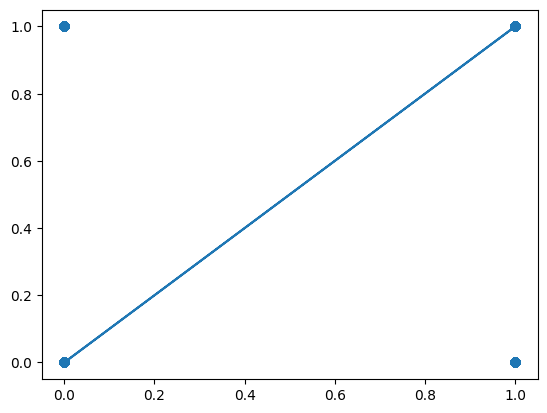

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

In [ ]:
#model valuation technique
'''

regression: MSE,MAE
Classification: Confusion matrix: loss batati h
                    Accuracy: percentage of correct predictions
                    recall
                    Precision
                    F1 Score

                Accuracy: (TP+TN)/(TP+FP+TN+FN): yeh balanced data pe lagti h
                            tab use krenge jab agar FP and FN equally important ho.
                Precision: jo model ne sahi predict kiye they vo actual me kitne sahi h
                            out of all predicted positive classes, how many were actually positive
                            TP/(TP+FP)
                recall(TPR)[True Positive Rate]: aap kitne actual cases ko sahi predic kr paye
                            out of actual positive how many were correctly predicted
                            TP/(TP+FN)
                F1 Score: yeh bhi performance batat h
                            yeh balance batata h between precision and recall
                            it focuses on the positive class performance
                            used on imbalanced data
                            2*(P*R)/(P+R)
                            P:precision
                            R: recall
                            jab FP and FN are costly
                            (costly matlab: in medical science agar cancer detection krna h
                                            FN: tset: NO
                                            Patient: cancer h
                                                toh aise case me FN bahut costly hojayega kyoki kisi ki jaaan bhi 
                                                ja skti h)
                                                            
Confusion matrix k liye humare paas sklearn me ek function h
'''

'\n\nregression: MSE,MAE\nClassification: Confusion matrix\n                recall\n                Pre\n                \n\n'

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[3523  479]
 [ 690 3089]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4002
         1.0       0.87      0.82      0.84      3779

    accuracy                           0.85      7781
   macro avg       0.85      0.85      0.85      7781
weighted avg       0.85      0.85      0.85      7781



NoneType

In [20]:
!pip install flask


   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ------------- -------------------------- 1/3 [itsdangerous]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   ---------------------------------------- 3/3 [flask]

